<a href="https://colab.research.google.com/github/Andrkenya/Project-2an2/blob/main/Chest_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chest Opacities Diagnosis

#By Andrew Bukenya MCSC, Makerere University

##Importing required libraries and tensorflow

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import pandas as pd

##Loading dataset from google drive

In [341]:
import pathlib
dataset_url = pathlib.Path("/content/drive/MyDrive/datasets/dt")

In [342]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



##Total number of images loaded from the dataset

In [343]:
image_count = len(list(dataset_url.rglob('*/*.png')))
print(image_count)

765


## 1.1 Defining paths for train, test, and validation sets

In [344]:
train_dt_path = '/content/drive/MyDrive/datasets/dt/training'
test_dt_path = '/content/drive/MyDrive/datasets/dt/test'
validation_dt_path = '/content/drive/MyDrive/datasets/dt/validation'

##Defining standard parameters

In [345]:
height = 488
width = 400
batch_size = 32

## Data preparation and Augmentation using ImageDataGenerator

In [346]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

image_gen = ImageDataGenerator(
            rescale = 1./255,
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip = True,
            )  

test_data_gen = ImageDataGenerator(rescale = 1./255)

dt_training = image_gen.flow_from_directory(
      train_dt_path,
      target_size=(height, width),
      color_mode='grayscale',
      class_mode='binary',
      shuffle=True,
      batch_size=batch_size
      )

dt_validation = test_data_gen.flow_from_directory(
      validation_dt_path,
      target_size=(height, width),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=batch_size
      )

test_set = test_data_gen.flow_from_directory(
      test_dt_path,
      target_size=(height, width),
      color_mode='grayscale',
      shuffle=False,
      class_mode='binary',
      batch_size=batch_size
      )

Found 572 images belonging to 2 classes.
Found 143 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


##Batch shape display

In [347]:
for image_batch, labels_batch in dt_training:
  print(image_batch.shape)
  break

for image_batch, labels_batch in dt_validation:
  print(image_batch.shape)
  break

for image_batch, labels_batch in test_set:
  print(image_batch.shape)
  break

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(32, 488, 400, 1)
(32, 488, 400, 1)
(32, 488, 400, 1)


In [348]:
type(dt_training)

keras.preprocessing.image.DirectoryIterator

##Visualization of data distribution on a bar graph.

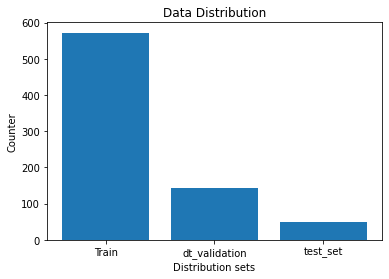

In [349]:
x = ["Train", "dt_validation", "test_set"]
h = [572, 143, 50]
plt.bar(x,h)
plt.xlabel("Distribution sets")
plt.ylabel("Counter")
plt.title("Data Distribution")
plt.show()

##Visualising the first 12 Images from training set

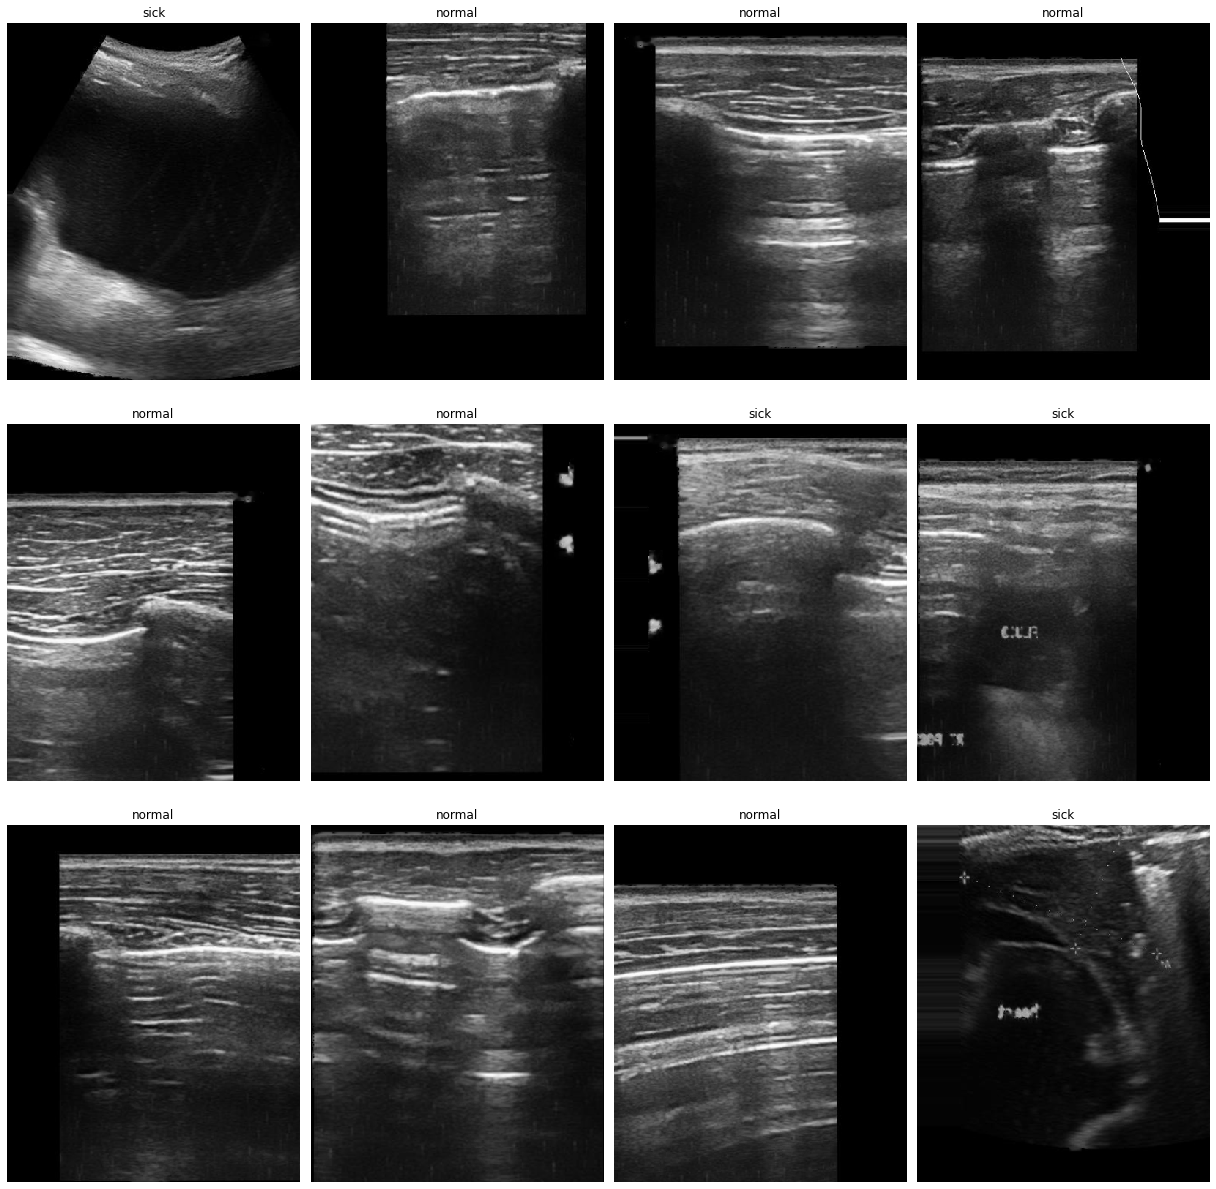

In [350]:
plt.figure(figsize=(17, 17))
for i in range(0, 12):
    plt.subplot(3, 4, i+1)
    for X_batch, Y_batch in dt_training:
        image = X_batch[0]        
        dic = {0:'normal', 1:'sick'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

## Importing model requirements from tensorflow.keras

In [351]:
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

##Model Creation

In [352]:
model = Sequential()

#Convolutions
model.add(layers.Conv2D(32, (3, 3), activation="relu",  padding="same", input_shape=(width, height, 1)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(width, height, 1)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation="relu", padding="same", input_shape=(width, height, 1)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same", input_shape=(width, height, 1)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same", input_shape=(width, height, 1)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation="relu", padding="same", input_shape=(width, height, 1)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

#Layer flattened
model.add(layers.Flatten())

#Fully Connected Layers
model.add(layers.Dense(activation = 'relu', units = 32))
model.add(layers.Dense(activation = 'relu', units = 2))
model.add(layers.Dense(activation = 'sigmoid', units = 1))

##Compiling the model, applying Adam optimizer

In [353]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 400, 488, 32)      320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 200, 244, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 200, 244, 64)      18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 100, 122, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 100, 122, 64)      36928     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 50, 61, 64)      

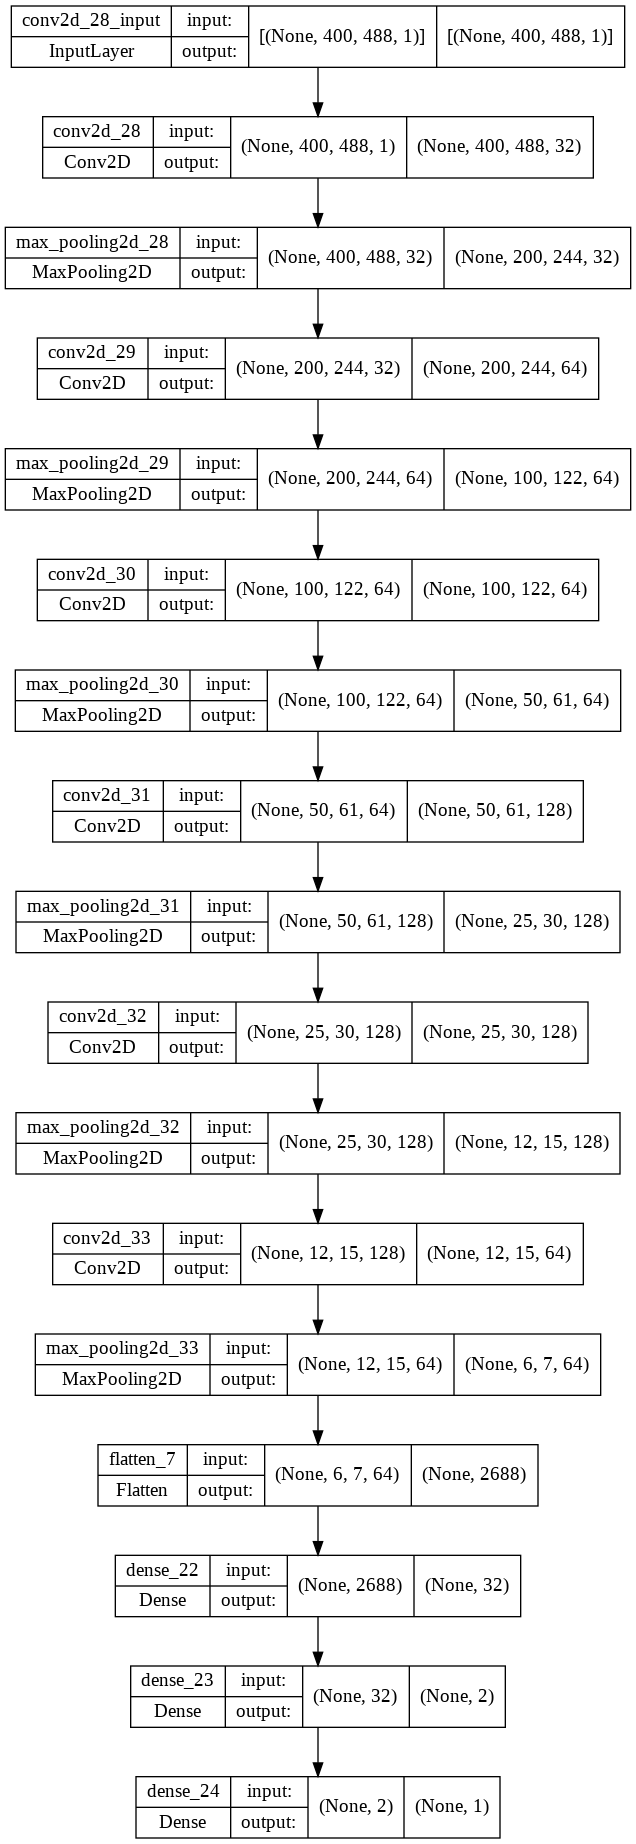

In [354]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

##Fitting the model and weights assignment

In [355]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early = EarlyStopping(monitor="val_loss", mode="min", patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [356]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(
            class_weight = "balanced",
            classes = np.unique(dt_training.classes),
            y = dt_training.classes                                                    
            )
class_weights = dict(zip(np.unique(dt_training.classes), weights))
class_weights

{0: 0.9828178694158075, 1: 1.0177935943060499}

##Training the model

In [357]:
history = model.fit(dt_training,epochs=30, validation_data=dt_validation, class_weight=class_weights, callbacks=callbacks_list)

Epoch 1/30
18/18 [==============================] - 13s 585ms/step - loss: 0.6752 - accuracy: 0.5262 - val_loss: 0.6712 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 2/30
18/18 [==============================] - 11s 579ms/step - loss: 0.6362 - accuracy: 0.6329 - val_loss: 0.4701 - val_accuracy: 0.8112 - lr: 0.0010
Epoch 3/30
18/18 [==============================] - 12s 654ms/step - loss: 0.4829 - accuracy: 0.7675 - val_loss: 0.5587 - val_accuracy: 0.7483 - lr: 0.0010
Epoch 4/30
18/18 [==============================] - ETA: 0s - loss: 0.3888 - accuracy: 0.8217
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
18/18 [==============================] - 12s 652ms/step - loss: 0.3888 - accuracy: 0.8217 - val_loss: 0.6489 - val_accuracy: 0.7343 - lr: 0.0010
Epoch 5/30
18/18 [==============================] - 10s 577ms/step - loss: 0.3563 - accuracy: 0.8287 - val_loss: 0.2975 - val_accuracy: 0.8741 - lr: 3.0000e-04
Epoch 6/30
18/18 [==============================] - 10s 5

##Model Visualization

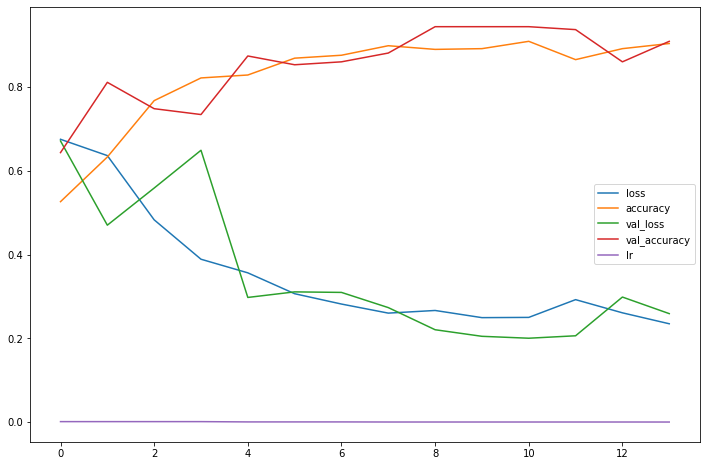

In [358]:
pd.DataFrame(model.history.history).plot(figsize=(12, 8))


##Performance on Test Data

In [359]:
accuracy_on_test = model.evaluate(test_set)
print('The testing accuracy is :',accuracy_on_test[1]*100, '%')

2/2 [==============================] - 1s 527ms/step - loss: 1.6107 - accuracy: 0.5000
The testing accuracy is : 50.0 %


In [360]:
model_predictions = model.predict(test_set,verbose=1)

2/2 [==============================] - 0s 96ms/step


###Saving the Neural Network Architecture and weights after training

In [361]:
#import os.path
#if os.path.isfile('chest_opacity_model4_50.hS') is False:
  #model.save('chest_opacity_model5_51.hS')
  #print('The model has been saved!')

In [362]:
predict = model_predictions.copy()
predict[predict <= 0.5] = 0
predict[predict > 0.5] = 1

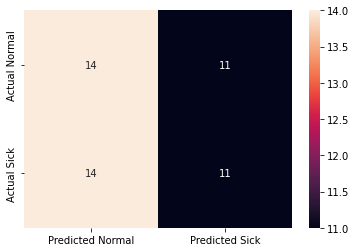

In [363]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(test_set.classes, predict, labels=[0, 1]),
                  index=["Actual Normal", "Actual Sick"],
                  columns=["Predicted Normal", "Predicted Sick"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [364]:
 print(classification_report(y_true=test_set.classes, y_pred=predict, target_names =['Normal','sick']))

              precision    recall  f1-score   support

      Normal       0.50      0.56      0.53        25
        sick       0.50      0.44      0.47        25

    accuracy                           0.50        50
   macro avg       0.50      0.50      0.50        50
weighted avg       0.50      0.50      0.50        50



In [365]:
test_set.reset()
x=np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y=np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x.shape)
print(y.shape)

(50, 488, 400, 1)
(50,)


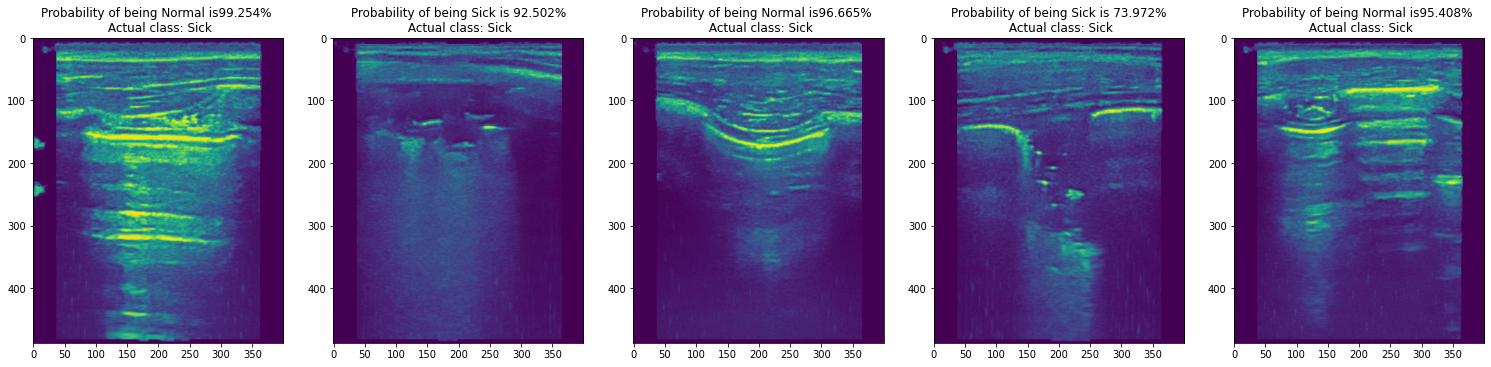

In [366]:
plt.figure(figsize=(26,8))
dic = {0:'Normal', 1:'Sick'}
for i in range(0+30, 5+30):
  plt.subplot(1, 5, (i-30)+1)
  if model_predictions[i, 0] >= 0.5: 
      out = ('Probability of being Sick is {:.3%}'.format(model_predictions[i][0]))
         
  else: 
      out = ('Probability of being Normal is{:.3%} '.format(1-model_predictions[i][0]))
      
  plt.title(out+"\n Actual class: "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('on')
plt.show()

##Performance on dataset 2

In [367]:
#Loading Dataset2
dataset2 = "/content/drive/MyDrive/datasets/dataset2"


In [368]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
  
dataset2_data_gen = ImageDataGenerator(rescale = 1./255)

dataset2 = dataset2_data_gen.flow_from_directory(
      dataset2,
      target_size=(height, width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )

Found 224 images belonging to 2 classes.


In [369]:
accuracy_on_dataset2 = model.evaluate(dataset2)
print('The testing accuracy is :',accuracy_on_dataset2[1]*100, '%')

7/7 [==============================] - 1s 142ms/step - loss: 1.2485 - accuracy: 0.5580
The testing accuracy is : 55.80357313156128 %


In [370]:
model_predictions = model.predict(dataset2,verbose=1)

7/7 [==============================] - 1s 142ms/step


In [371]:
predict = model_predictions.copy()
predict[predict <= 0.5] = 0
predict[predict > 0.5] = 1

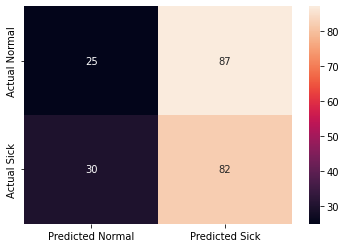

In [372]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(dataset2.classes, predict, labels=[0, 1]),
                  index=["Actual Normal", "Actual Sick"],
                  columns=["Predicted Normal", "Predicted Sick"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [373]:
 print(classification_report(y_true=dataset2.classes, y_pred=predict, target_names =['Normal','Sick']))

              precision    recall  f1-score   support

      Normal       0.45      0.22      0.30       112
        Sick       0.49      0.73      0.58       112

    accuracy                           0.48       224
   macro avg       0.47      0.48      0.44       224
weighted avg       0.47      0.48      0.44       224



In [374]:
dataset2.reset()
x=np.concatenate([dataset2.next()[0] for i in range(dataset2.__len__())])
y=np.concatenate([dataset2.next()[1] for i in range(dataset2.__len__())])
print(x.shape)
print(y.shape)

(224, 488, 400, 1)
(224,)


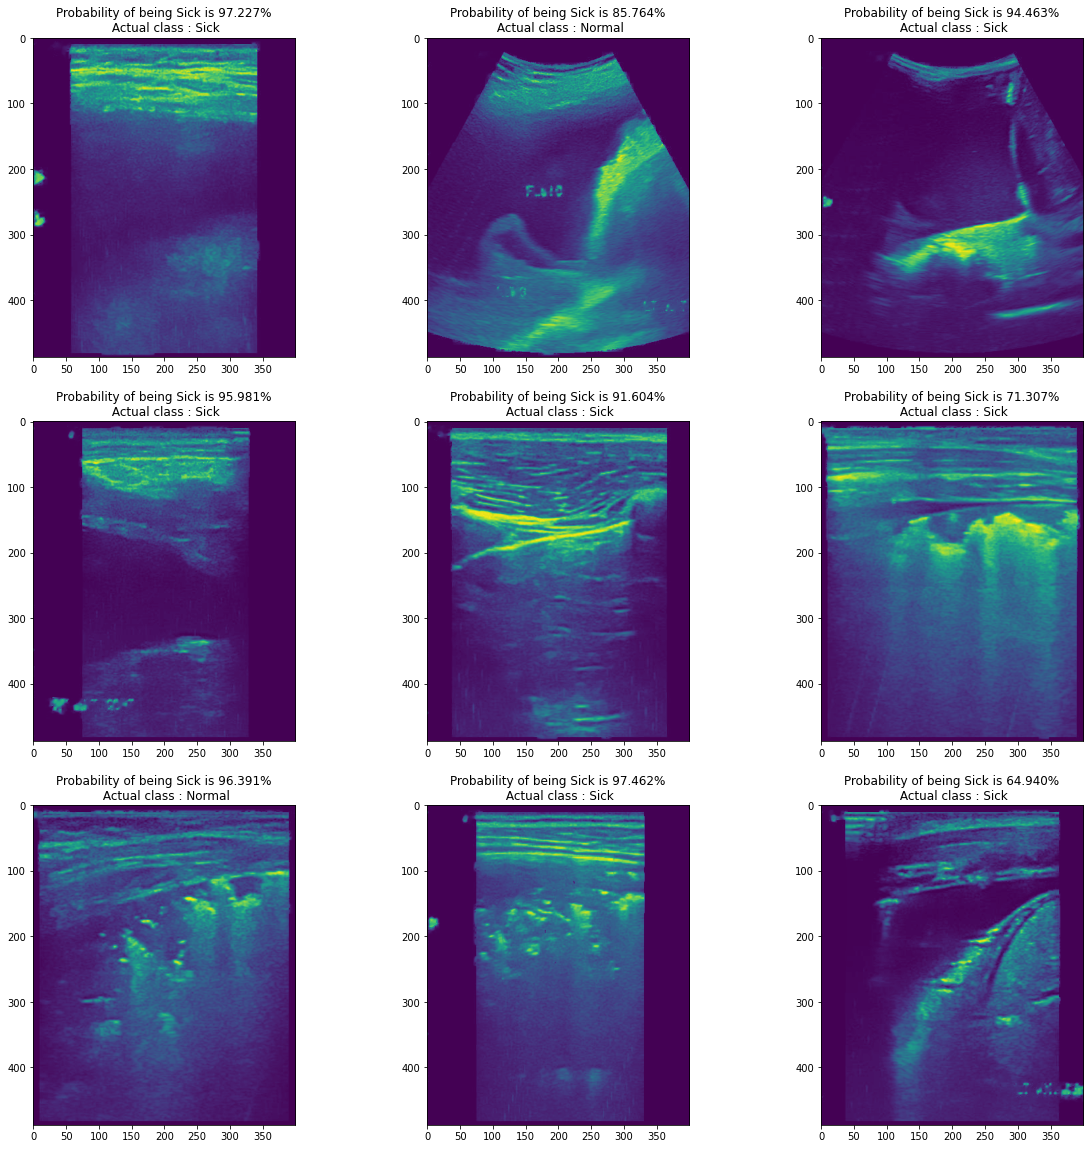

In [375]:
dic = {0:'Normal', 1:'Sick'}
plt.figure(figsize=(20,20))
for i in range(0+28, 9+28):
  plt.subplot(3, 3, (i-28)+1)
  if model_predictions[i, 0] >= 0.5: 
      out = ('Probability of being Sick is {:.3%}'.format(model_predictions[i][0]))
      
      
  else: 
      out = ('Probability of being Normal is {:.3%}'.format(1-model_predictions[i][0]))
      
      

  plt.title(out+"\n Actual class : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('on')
plt.show()